In [77]:
# DSC550
# Week 10
# Milestone 1-3
# Author: Nathanael Ochoa
# 05/19/2024

# Term Project Milestone 1: Data Selection and EDA

My business problem/idea is using the [MyAnimeList Anime and Manga Datasets](https://www.kaggle.com/datasets/andreuvallhernndez/myanimelist?select=manga.csv) available on [Kaggle](https://www.kaggle.com/) to find out which manga are worth animating. I know that this is not how it works in the real world, so bear with me here, but I thought it would be fun to picture a single group of executives sitting around a circular table that decides on which manga gets its own anime. MyAnimeList is an online anime and manga community and database. The author of the dataset used APIs to scrape the data from MyAnimeList themselves. Unfortunately, I have no access to profit data for any of the anime and/or manga in the data files I do have, but I will still be able to compare the ratings. I plan on getting the anime score data and adding it to the manga dataset. This will be the "target" variable in the model. I want to create a model that will help with future decision making. The bosses at the table can use the model to estimate the manga's animation success/score.

In [168]:
# Import packages
import ast

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [79]:
# Import anime.csv and manga.csv as data frames
anime = pd.read_csv("D:/DSC550TermProjectData/anime.csv")
manga = pd.read_csv("D:/DSC550TermProjectData/manga.csv")

In [80]:
# Preview anime dataset
anime.head()

,anime_id,title,type,score,scored_by,status,episodes,start_date,end_date,source,...,producers,licensors,synopsis,background,main_picture,url,trailer_url,title_english,title_japanese,title_synonyms
0,5114,Fullmetal Alchemist: Brotherhood,tv,9.10,2037075,finished_airing,64.0,2009-04-05,2010-07-04,manga,...,"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","['Funimation', 'Aniplex of America']",After a horrific alchemy experiment goes wrong...,NaN,https://cdn.myanimelist.net/images/anime/1208/...,https://myanimelist.net/anime/5114/Fullmetal_A...,https://www.youtube.com/watch?v=--IcmZkvL0Q,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,['Hagane no Renkinjutsushi: Fullmetal Alchemis...
1,11061,Hunter x Hunter (2011),tv,9.04,1671587,finished_airing,148.0,2011-10-02,2014-09-24,manga,...,"['VAP', 'Nippon Television Network', 'Shueisha']",['VIZ Media'],Hunters devote themselves to accomplishing haz...,NaN,https://cdn.myanimelist.net/images/anime/1337/...,https://myanimelist.net/anime/11061/Hunter_x_H...,https://www.youtube.com/watch?v=D9iTQRB4XRk,Hunter x Hunter,HUNTER×HUNTER（ハンター×ハンター）,['HxH (2011)']
2,38524,Shingeki no Kyojin Season 3 Part 2,tv,9.05,1491491,finished_airing,10.0,2019-04-29,2019-07-01,manga,...,"['Production I.G', 'Dentsu', 'Mainichi Broadca...",['Funimation'],Seeking to restore humanity's diminishing hope...,Shingeki no Kyojin adapts content from volumes...,https://cdn.myanimelist.net/images/anime/1517/...,https://myanimelist.net/anime/38524/Shingeki_n...,https://www.youtube.com/watch?v=hKHepjfj5Tw,Attack on Titan Season 3 Part 2,進撃の巨人 Season3 Part.2,[]
3,9253,Steins;Gate,tv,9.07,1348232,finished_airing,24.0,2011-04-06,2011-09-14,visual_novel,...,"['Frontier Works', 'Media Factory', 'Kadokawa ...",['Funimation'],Eccentric scientist Rintarou Okabe has a never...,Steins;Gate is based on 5pb. and Nitroplus' vi...,https://cdn.myanimelist.net/images/anime/1935/...,https://myanimelist.net/anime/9253/Steins_Gate,https://www.youtube.com/watch?v=27OZc-ku6is,Steins;Gate,STEINS;GATE,[]
4,28851,Koe no Katachi,movie,8.94,1540277,finished_airing,1.0,2016-09-17,2016-09-17,manga,...,"['Shochiku', 'Pony Canyon', 'Kodansha', 'ABC A...","['Eleven Arts', 'NYAV Post']","As a wild youth, elementary school student Sho...",Koe no Katachi won the following awards: Japan...,https://cdn.myanimelist.net/images/anime/1122/...,https://myanimelist.net/anime/28851/Koe_no_Kat...,https://www.youtube.com/watch?v=XBNWo25izJ8,A Silent Voice,聲の形,['The Shape of Voice']


**The following is taken directly from the file's source**
* anime_id - MyAnimeList anime ID
* title - Title (rōmaji or english)
* type - Anime media type
* score - MAL weighted score
* scored_by - Number of users who scored this anime
* status - Airing status
* episodes - Number of episodes
* start_date - Airing start date
* end_date - Airing end date
* source - Original material/source adapted from
* members - Number of users with this anime in their list
* favorites - Number of users who favorited this anime
* episode_duration - Average episode duration
* total_duration - Anime total duration
* rating - Anime audience rating
* sfw - Whether it's safe for work or it's R18+
* approved - Whether it's approved or is yet 'pending approval'
* created_at - MAL anime entry creation date
* updated_at - MAL anime entry latest update date
* start_year - Seasonal anime start year
* real_start_date - Some entries only have year or year-month
* real_end_date - Some entries only have year or year-month
* broadcast_time - Weekly anime day of broadcast
* genres - List of genres
* themes - List of themes
* demographics - List of demographics
* studios - List of studios
* producers - Lise of producers
* licensors - List of licensors
* synopsis - Anime description
* background - Anime additional information
* main_picture - MAL main picture url
* url - MyAnimeList url
* trailer_url - Trailer url
* title_english - Title in english
* title_japanese - Title in japanese
* title_synonyms - List of title synonyms

In [81]:
# Preview manga dataset
manga.head()

,manga_id,title,type,score,scored_by,status,volumes,chapters,start_date,end_date,...,demographics,authors,serializations,synopsis,background,main_picture,url,title_english,title_japanese,title_synonyms
0,2,Berserk,manga,9.47,319696,currently_publishing,NaN,NaN,1989-08-25,NaN,...,['Seinen'],"[{'id': 1868, 'first_name': 'Kentarou', 'last_...",['Young Animal'],"Guts, a former mercenary now known as the ""Bla...",Berserk won the Award for Excellence at the si...,https://cdn.myanimelist.net/images/manga/1/157...,https://myanimelist.net/manga/2/Berserk,Berserk,ベルセルク,['Berserk: The Prototype']
1,13,One Piece,manga,9.22,355375,currently_publishing,NaN,NaN,1997-07-22,NaN,...,['Shounen'],"[{'id': 1881, 'first_name': 'Eiichiro', 'last_...",['Shounen Jump (Weekly)'],"Gol D. Roger, a man referred to as the ""King o...",One Piece is the highest selling manga series ...,https://cdn.myanimelist.net/images/manga/2/253...,https://myanimelist.net/manga/13/One_Piece,One Piece,ONE PIECE,[]
2,1706,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,manga,9.30,151433,finished,24.0,96.0,2004-01-19,2011-04-19,...,"['Seinen', 'Shounen']","[{'id': 2619, 'first_name': 'Hirohiko', 'last_...",['Ultra Jump'],"In the American Old West, the world's greatest...",JoJo no Kimyou na Bouken Part 7: Steel Ball Ru...,https://cdn.myanimelist.net/images/manga/3/179...,https://myanimelist.net/manga/1706/JoJo_no_Kim...,NaN,ジョジョの奇妙な冒険 Part7 STEEL BALL RUN,"[""JoJo's Bizarre Adventure Part 7: Steel Ball ..."
3,4632,Oyasumi Punpun,manga,9.02,168459,finished,13.0,147.0,2007-03-15,2013-11-02,...,['Seinen'],"[{'id': 2836, 'first_name': 'Inio', 'last_name...",['Big Comic Spirits'],Punpun Onodera is a normal 11-year-old boy liv...,Oyasumi Punpun was originally serialized in Yo...,https://cdn.myanimelist.net/images/manga/3/266...,https://myanimelist.net/manga/4632/Oyasumi_Punpun,Goodnight Punpun,おやすみプンプン,[]
4,25,Fullmetal Alchemist,manga,9.03,153151,finished,27.0,116.0,2001-07-12,2010-09-11,...,['Shounen'],"[{'id': 1874, 'first_name': 'Hiromu', 'last_na...",['Shounen Gangan'],Alchemists are knowledgeable and naturally tal...,Hagane no Renkinjutsushi won the 49th Shogakuk...,https://cdn.myanimelist.net/images/manga/3/243...,https://myanimelist.net/manga/25/Fullmetal_Alc...,Fullmetal Alchemist,鋼の錬金術師,"['Full Metal Alchemist', 'Hagane no Renkinjuts..."


**The following is taken directly from the file's source**
* manga_id - MyAnimeList manga ID
* title - Title (rōmaji or english)
* type - Manga media type
* score - MAL weighted score
* scored_by - Number of users who scored this manga
* status - Publishing status
* volumes - Number of volumes
* chapters - Number of chapters
* start_date - Publishing start date
* end_date - Publishing end date
* members - Number of users with this manga in their list
* favorites - Number of users who favorited this anime
* sfw - Whether it's safe for work or it's R18+
* approved - Whether it's approved or is yet 'pending approval'
* created_at_before - MAL manga entry created before this date
* updated_at - MAL manga entry latest update date
* real_start_date - Some entries only have year or year-month
* real_end_date - Some entries only have year or year-month
* genres - List of genres
* themes - List of themes
* demographics - List of demographics
* authors - List of authors (id, first and last name, role)
* serializations - List of magazines where it's been published
* synopsis - Manga description
* background - Manga additional information
* main_picture - MAL main picture url
* url - MyAnimeList url
* title_english - Title in english
* title_japanese - Title in japanese
* title_synonyms - List of title synonyms

## Manga Scatter Plot of *Score* vs. *Chapters*

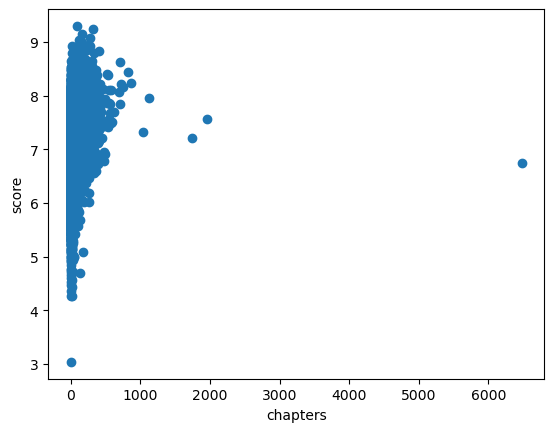

In [82]:
# Create scatter plot
plt.scatter(manga["chapters"], manga["score"])
plt.xlabel("chapters")
plt.ylabel("score")
plt.show()

I wanted to analyze manga performance to get a better idea of scoring since manga is the baseline of my analysis. There are a couple of outliers but there's no general pattern visible. Not a lot of manga have reached 1000 chapters so let's try it again but limit the x-axis to 1000.

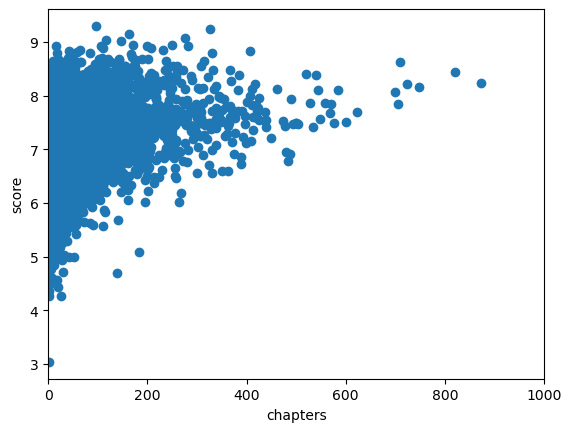

In [83]:
# Shortened scatter plot
plt.scatter(manga["chapters"], manga["score"])
plt.xlabel("chapters")
plt.ylabel("score")
plt.xlim(0, 1000)
plt.show()

We lose visibility on a couple of manga but now we can see an actual pattern within the data. It's still very bundled up around the 100 chapter mark but it does seem to increase. Manga with higher chapters do seem to have an overall better score but of course the quality of chapters is always best.

## Anime Scatter Plot of *Episodes* vs. *Score*

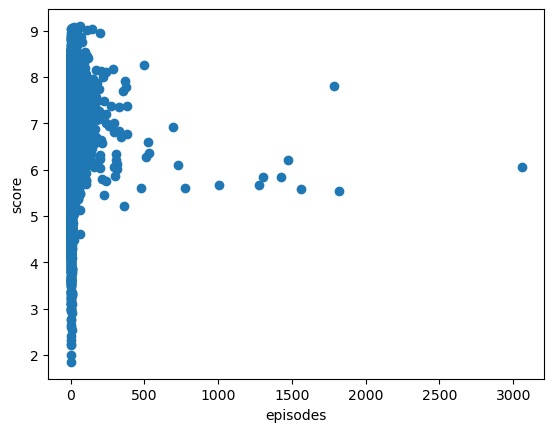

In [84]:
# Create scatter plot
plt.scatter(anime["episodes"], anime["score"])
plt.xlabel("episodes")
plt.ylabel("score")
plt.show()

I'm pretty sure I can name that anime that has 3000 episodes but again I'll limit the x-axis to 1000 so there's a visible pattern.

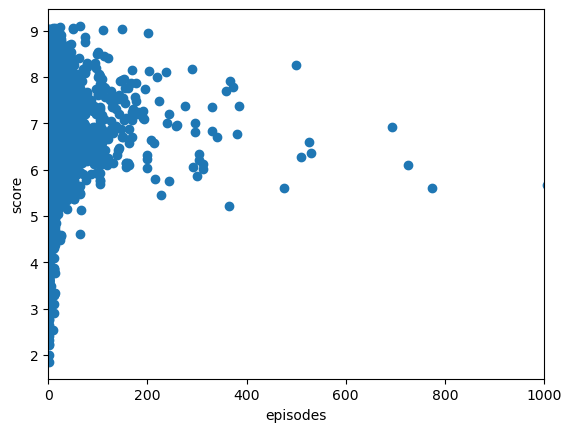

In [85]:
# Create scatter plot
plt.scatter(anime["episodes"], anime["score"])
plt.xlabel("episodes")
plt.ylabel("score")
plt.xlim(0, 1000)
plt.show()

There's still no clear pattern available so there does not seem to be a relationship between the two variables. I won't focus on anime episode counts in my analysis but I was curious to view the relationship between episodes and score. 

## Top 25 Highest Rating Anime

In [86]:
# Creating the top 25 dataset
anime_top25 = anime.sort_values(by = ["score"], ascending = False).head(25)

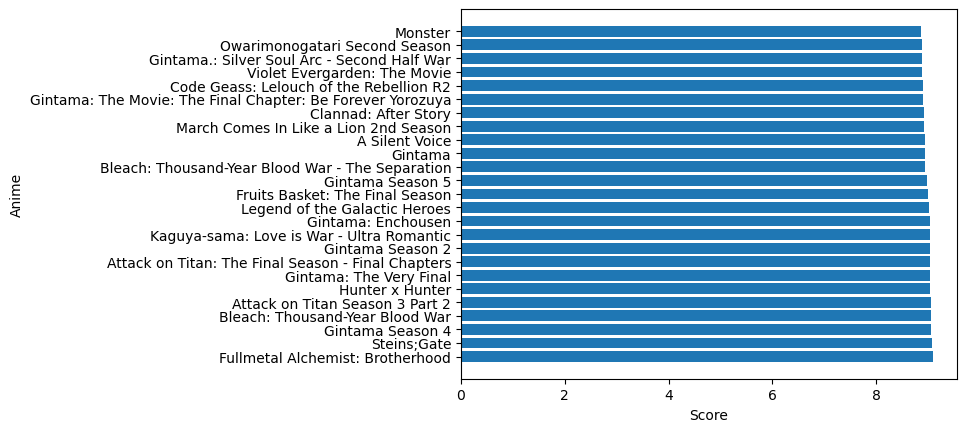

In [87]:
# Plot
plt.barh(anime_top25["title_english"], anime_top25["score"])
plt.xlabel("Score")
plt.ylabel("Anime")
plt.show()

Now let's compare to the top 25 highest manga titles.

## Top 25 Highest Rating Manga

In [88]:
# Creating the top 25 dataset
manga_top25 = manga.sort_values(by = ["score"], ascending = False).head(25)

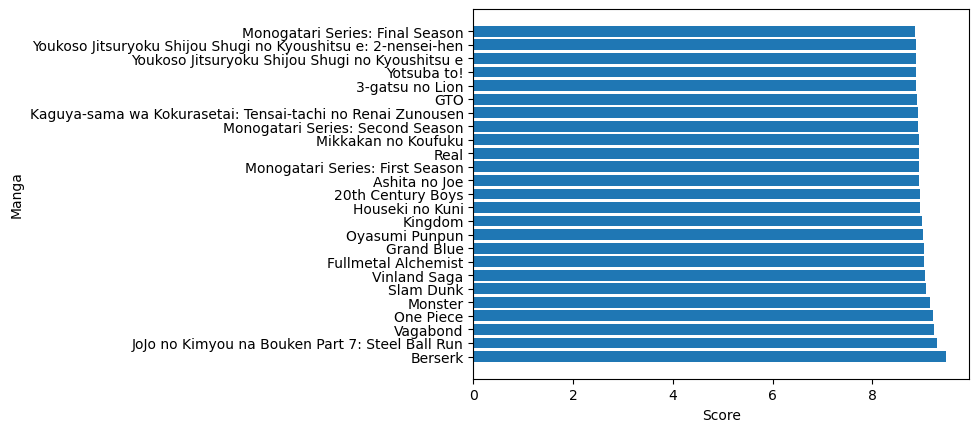

In [89]:
# Plot
plt.barh(manga_top25["title"], manga_top25["score"])
plt.xlabel("Score")
plt.ylabel("Manga")
plt.show()

Not a lot of titles line up so I'll have to create a merged dataset that combines the scores and names of each data set.

Everything is a bit lackluster at the moment, I realized that the anime dataset contains the titles/licenses separated by seasons meanwhile the manga dataset contains it all in a single entry. This means that I'll have to combine the anime entries and average out the scores. It's a bit unfortunate that the anime_id and manga_id columns don't coincide but I'll make do.

# Term Project Milestone 2: Data Preparation 

As mentioned before the anime dataset has extra rows for the same title/series. Below is the perfect example:

In [90]:
# Manga title "Shingeki no Kyojin" (english title: Attack on Titan)
manga.query("title == 'Shingeki no Kyojin'")

,manga_id,title,type,score,scored_by,status,volumes,chapters,start_date,end_date,...,demographics,authors,serializations,synopsis,background,main_picture,url,title_english,title_japanese,title_synonyms
22,23390,Shingeki no Kyojin,manga,8.55,394362,finished,34.0,141.0,2009-09-09,2021-04-09,...,['Shounen'],"[{'id': 11705, 'first_name': 'Hajime', 'last_n...",['Bessatsu Shounen Magazine'],"Hundreds of years ago, horrifying creatures wh...",Shingeki no Kyojin won the Kodansha Manga Awar...,https://cdn.myanimelist.net/images/manga/2/378...,https://myanimelist.net/manga/23390/Shingeki_n...,Attack on Titan,進撃の巨人,[]


In [91]:
# All of the titles that contain "Shingeki no Kyojin" in the anime dataset
anime[anime["title"].str.contains(pat = "Shingeki no Kyojin", regex = False)]

,anime_id,title,type,score,scored_by,status,episodes,start_date,end_date,source,...,producers,licensors,synopsis,background,main_picture,url,trailer_url,title_english,title_japanese,title_synonyms
2,38524,Shingeki no Kyojin Season 3 Part 2,tv,9.05,1491491,finished_airing,10.0,2019-04-29,2019-07-01,manga,...,"['Production I.G', 'Dentsu', 'Mainichi Broadca...",['Funimation'],Seeking to restore humanity's diminishing hope...,Shingeki no Kyojin adapts content from volumes...,https://cdn.myanimelist.net/images/anime/1517/...,https://myanimelist.net/anime/38524/Shingeki_n...,https://www.youtube.com/watch?v=hKHepjfj5Tw,Attack on Titan Season 3 Part 2,進撃の巨人 Season3 Part.2,[]
7,40028,Shingeki no Kyojin: The Final Season,tv,8.80,1237778,finished_airing,16.0,2020-12-07,2021-03-29,manga,...,"['Production I.G', 'Dentsu', 'Mainichi Broadca...",['Funimation'],Gabi Braun and Falco Grice have been training ...,Shingeki no Kyojin: The Final Season adapts co...,https://cdn.myanimelist.net/images/anime/1000/...,https://myanimelist.net/anime/40028/Shingeki_n...,https://www.youtube.com/watch?v=SlNpRThS9t8,Attack on Titan: Final Season,進撃の巨人 The Final Season,"['Shingeki no Kyojin Season 4', 'Attack on Tit..."
13,35760,Shingeki no Kyojin Season 3,tv,8.62,1524632,finished_airing,12.0,2018-07-23,2018-10-15,manga,...,"['Production I.G', 'Dentsu', 'Mainichi Broadca...",['Funimation'],"Still threatened by the ""Titans"" that rob them...",Shingeki no Kyojin Season 3 adapts content fro...,https://cdn.myanimelist.net/images/anime/1173/...,https://myanimelist.net/anime/35760/Shingeki_n...,https://www.youtube.com/watch?v=EHzBhrncmac,Attack on Titan Season 3,進撃の巨人 Season3,[]
16,16498,Shingeki no Kyojin,tv,8.54,2685033,finished_airing,25.0,2013-04-07,2013-09-29,manga,...,"['Production I.G', 'Dentsu', 'Mainichi Broadca...",['Funimation'],"Centuries ago, mankind was slaughtered to near...",Shingeki no Kyojin adapts content from the fir...,https://cdn.myanimelist.net/images/anime/10/47...,https://myanimelist.net/anime/16498/Shingeki_n...,https://www.youtube.com/watch?v=LHtdKWJdif4,Attack on Titan,進撃の巨人,"['AoT', 'SnK']"
22,25777,Shingeki no Kyojin Season 2,tv,8.51,1780194,finished_airing,12.0,2017-04-01,2017-06-17,manga,...,"['Production I.G', 'Dentsu', 'Mainichi Broadca...",['Funimation'],"For centuries, humanity has been hunted by gia...",Shingeki no Kyojin Season 2 adapts content fro...,https://cdn.myanimelist.net/images/anime/4/841...,https://myanimelist.net/anime/25777/Shingeki_n...,https://www.youtube.com/watch?v=zLaVP8IhIuc,Attack on Titan Season 2,進撃の巨人 Season2,[]
33,48583,Shingeki no Kyojin: The Final Season Part 2,tv,8.77,647730,finished_airing,12.0,2022-01-10,2022-04-04,manga,...,"['Production I.G', 'Dentsu', 'Mainichi Broadca...",[],Turning against his former allies and enemies ...,Shingeki no Kyojin: The Final Season Part 2 ad...,https://cdn.myanimelist.net/images/anime/1948/...,https://myanimelist.net/anime/48583/Shingeki_n...,https://www.youtube.com/watch?v=EIVVnLlhzr0,Attack on Titan: Final Season Part 2,進撃の巨人 The Final Season Part 2,"['Shingeki no Kyojin Season 4', 'Attack on Tit..."
135,25781,Shingeki no Kyojin: Kuinaki Sentaku,ova,8.41,295085,finished_airing,2.0,2014-12-09,2015-04-09,visual_novel,...,"['Production I.G', 'Dentsu', 'Mainichi Broadca...",[],Many years before becoming the famed captain o...,Shingeki no Kyojin: Kuinaki Sentaku is based o...,https://cdn.myanimelist.net/images/anime/8/694...,https://myanimelist.net/anime/25781/Shingeki_n...,https://www.youtube.com/watch?v=zDjZS2PSZ9o,Attack on Titan: No Regrets,進撃の巨人 悔いなき選択,['Shingeki no Kyojin: Birth of Levi']
187,51535,Shingeki no Kyojin: The Final Season - Kankets...,special,9.04,170844,currently_airing,2.0,2023-03-04,2023-01-01,manga,...,"['Production I.G', 'Dentsu', 'Mainichi Broadca...",[],In the wake of Eren Yeager's cataclysmic actio...,Shingeki no Kyojin: Final Season - Kanketsu-he...,https://cdn.myanimelist.net/images/anime/1279/...,https://myanimelist.net/anime/51535/Shingeki_

There are different types in the anime dataset query but to simplify things I thought it was best to use the average of all of the values in the score column. So for the above case the mean is: 

In [92]:
# This compares the manga score and the anime average score
snk_average = round(anime[anime["title"].str.contains(pat = "Shingeki no Kyojin", regex = False)]["score"].mean(), 2)

print("Shingeki no Kyojin manga score:         {}".format(manga.loc[22][3]))
print("Shingeki no Kyojin average anime score: {}".format(snk_average))

Shingeki no Kyojin manga score:         8.55
Shingeki no Kyojin average anime score: 7.69


This will be done to every title in the manga dataset and if there is no anime available the value returned will be "no mean" (*the "no mean" value will also be replaced towards the end using the value in the row's score column*). This will be accomplished using the **getAvgScore** function:

In [93]:
# This function queries the rows in the anime dataset that contain the title from the manga dataset. The mean score of the 
# queried rows is calculated and rounded to the 2nd decimal. If no rows are returned then the default value "no mean" is 
# returned. NaN is returned if there is an anime available but the anime score is NaN.
def getAvgScore(name):
    avg = "no mean"
    if name.strip():
        contains_name = anime["title"].str.contains(pat = name, regex = False).unique()
        if True in contains_name:
            avg = round(anime[anime["title"].str.contains(pat = name, regex = False)]["score"].mean(), 2)
        else:
            pass
    else:
        avg = "invalid"
    return avg

Next, I'll create a shorter data frame that will only use the following variables: **title**, **title_english**, **type**, **status**, **score**, **chapters**, **favorites**, **sfw**, **avg_anime_score**. I will also be creating dummy variables out of the **genres** column. I will also add a column named **avg_anime_favs** using a function similar to that of **getAvgScore** that will return the mean of the values in the anime dataset's **favorites** column. In my opinion, these are the most important variables that may influence the target column: **avg_anime_score** the most.

As a reminder:

**The following is taken directly from the file's source**
* title - Title (rōmaji or english)
* title_english - Title in english
* type - Manga media type
* status - Publishing status
* chapters - Number of chapters
* sfw - Whether it's safe for work or it's R18+
* score - MAL weighted score
* favorites - Number of users who favorited this anime
* genres - List of genres


In [94]:
# This function is similar to getAvgScore but returns the average values in the favorites column
def getAvgFavs(name):
    avg = "no mean"
    if name.strip():
        contains_name = anime["title"].str.contains(pat = name, regex = False).unique()
        if True in contains_name:
            avg = round(anime[anime["title"].str.contains(pat = name, regex = False)]["favorites"].mean())
        else:
            pass
    else:
        avg = "invalid"
    return avg

In [95]:
# View all columns
manga.columns

Index(['manga_id', 'title', 'type', 'score', 'scored_by', 'status', 'volumes',
       'chapters', 'start_date', 'end_date', 'members', 'favorites', 'sfw',
       'approved', 'created_at_before', 'updated_at', 'real_start_date',
       'real_end_date', 'genres', 'themes', 'demographics', 'authors',
       'serializations', 'synopsis', 'background', 'main_picture', 'url',
       'title_english', 'title_japanese', 'title_synonyms'],
      dtype='object')

In [96]:
# Function call and create new column
manga["avg_anime_score"] = manga["title"].apply(getAvgScore)

In [97]:
# Function call and create new column
manga["avg_anime_favs"] = manga["title"].apply(getAvgFavs)

Next I'll create a shorter dataset that I'll be using:

In [98]:
# The dummy variables will be created separatly and concatenated.
new_manga = manga[["title", "title_english", "type", "status", "chapters", "sfw", "score", "avg_anime_score", "favorites", 
                  "avg_anime_favs"]]

In [99]:
# Preview data
new_manga.head()

,title,title_english,type,status,chapters,sfw,score,avg_anime_score,favorites,avg_anime_favs
0,Berserk,Berserk,manga,currently_publishing,NaN,True,9.47,7.15,119470,2935
1,One Piece,One Piece,manga,currently_publishing,NaN,True,9.22,7.1,111462,3373
2,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,NaN,manga,finished,96.0,True,9.30,no mean,41713,no mean
3,Oyasumi Punpun,Goodnight Punpun,manga,finished,147.0,True,9.02,no mean,49361,no mean
4,Fullmetal Alchemist,Fullmetal Alchemist,manga,finished,116.0,True,9.03,7.65,29634,27318


The "no mean" values in both of the average columns will be replaced with the values in the **score** and **favorites** columns, respectively.

Now I'll create the dummy variables out of the **genres** column:

In [100]:
# Apply ast.literal_eval to the 'genres' column
manga["genres"] = manga["genres"].apply(ast.literal_eval)

# Explode
exploded_manga = manga.explode("genres")

# Create data frame
dummy_genres = pd.get_dummies(exploded_manga["genres"], prefix = "genre", drop_first = True)

# Combine the different genres together
dummy_genres = dummy_genres.groupby(dummy_genres.index).sum()

In [101]:
# Preview dummies
dummy_genres.head()

,genre_Adventure,genre_Avant Garde,genre_Award Winning,genre_Boys Love,genre_Comedy,genre_Drama,genre_Ecchi,genre_Erotica,genre_Fantasy,genre_Girls Love,genre_Gourmet,genre_Hentai,genre_Horror,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Slice of Life,genre_Sports,genre_Supernatural,genre_Suspense
0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


Now I'll use concat() to combine the 2 data frames together:

In [102]:
# Combine the data frames
final_manga = pd.concat([new_manga, dummy_genres], axis = 1)

In [103]:
# Preview data
final_manga.head()

,title,title_english,type,status,chapters,sfw,score,avg_anime_score,favorites,avg_anime_favs,...,genre_Gourmet,genre_Hentai,genre_Horror,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Slice of Life,genre_Sports,genre_Supernatural,genre_Suspense
0,Berserk,Berserk,manga,currently_publishing,NaN,True,9.47,7.15,119470,2935,...,0,0,1,0,0,0,0,0,1,0
1,One Piece,One Piece,manga,currently_publishing,NaN,True,9.22,7.1,111462,3373,...,0,0,0,0,0,0,0,0,0,0
2,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,NaN,manga,finished,96.0,True,9.30,no mean,41713,no mean,...,0,0,0,1,0,0,0,0,1,0
3,Oyasumi Punpun,Goodnight Punpun,manga,finished,147.0,True,9.02,no mean,49361,no mean,...,0,0,0,0,0,0,1,0,0,0
4,Fullmetal Alchemist,Fullmetal Alchemist,manga,finished,116.0,True,9.03,7.65,29634,27318,...,0,0,0,0,0,0,0,0,0,0


I'll get the simple cleanup out of the way first. I'll replace any NaN values in the **title_english** column with "unavailable" and then I'll replace "no mean" values in the **avg_anime_favs** column with values from their respective **favorites** values.

In [104]:
# Replace NaN values in title_english
final_manga["title_english"].fillna("unavailable", inplace = True)

In [105]:
# Replace 'no mean' values with their respective 'score' values
no_mean_favs = final_manga.loc[final_manga["avg_anime_favs"] == "no mean"]

final_manga.loc[no_mean_favs.index, "avg_anime_favs"] = no_mean_favs["favorites"]

In [106]:
# Check 'avg_anime_favs' column
final_manga.loc[final_manga["avg_anime_favs"] == "no mean"]

,title,title_english,type,status,chapters,sfw,score,avg_anime_score,favorites,avg_anime_favs,...,genre_Gourmet,genre_Hentai,genre_Horror,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Slice of Life,genre_Sports,genre_Supernatural,genre_Suspense


Now let's check for NaN values in the other columns:

In [107]:
# Check columns for empty values
print("The 'title' column contains Nan - %s" % final_manga.title.isnull().values.any())
print("The 'title_english' column contains Nan - %s" % final_manga.title_english.isnull().values.any())
print("The 'type' column contains Nan - %s" % final_manga.type.isnull().values.any())
print("The 'status' column contains Nan - %s" % final_manga.status.isnull().values.any())
print("The 'chapters' column contains Nan - %s" % final_manga.chapters.isnull().values.any())
print("The 'sfw' column contains Nan - %s" % final_manga.sfw.isnull().values.any())
print("The 'score' column contains Nan - %s" % final_manga.score.isnull().values.any())
print("The 'avg_anime_score' column contains Nan - %s" % final_manga.avg_anime_score.isnull().values.any())
print("The 'favorites' column contains Nan - %s" % final_manga.favorites.isnull().values.any())
print("The 'avg_anime_favs' column contains Nan - %s" % final_manga.avg_anime_favs.isnull().values.any())

The 'title' column contains Nan - False
The 'title_english' column contains Nan - False
The 'type' column contains Nan - False
The 'status' column contains Nan - False
The 'chapters' column contains Nan - True
The 'sfw' column contains Nan - False
The 'score' column contains Nan - True
The 'avg_anime_score' column contains Nan - True
The 'favorites' column contains Nan - False
The 'avg_anime_favs' column contains Nan - False


So I'll have to correct the NaN values in the following columns: **chapters**, **score**, **avg_anime_score**. Any NaN values in either of the score columns will be replaced with the value from the other score column. Rows with NaN and "no mean" will also be dropped. If the row contains NaN in both columns then the row will be dropped. The "no mean" average values will be replaced with their respective scores and the NaN **chapters** values will be replaced with the column mean.

First replace the NaN values in the **score** columns:

In [108]:
# These rows have an 'avg_anime_rating' but an NaN value under the 'score' column. The 'score' values will be replaced with 
# their respective 'avg_anime_score' values
selected1 = final_manga.loc[(final_manga["score"].isnull()) & (final_manga["avg_anime_score"].notnull()) & 
                            (final_manga["avg_anime_score"] != "no mean")]

final_manga.loc[selected1.index, "score"] = selected1["avg_anime_score"]

In [109]:
# Check, nothing is returned so this worked
final_manga.loc[(final_manga["score"].isnull()) & (final_manga["avg_anime_score"].notnull()) & 
                            (final_manga["avg_anime_score"] != "no mean")]

,title,title_english,type,status,chapters,sfw,score,avg_anime_score,favorites,avg_anime_favs,...,genre_Gourmet,genre_Hentai,genre_Horror,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Slice of Life,genre_Sports,genre_Supernatural,genre_Suspense


Next drop the rows that contain NaN in both score columns:

In [110]:
# These rows will be dropped since their is an anime available but NaN was returned. The manga score is also NaN.
rows_to_drop = final_manga.loc[(final_manga["score"].isnull()) & (final_manga["avg_anime_score"].isnull())]

final_manga.drop(rows_to_drop.index, inplace = True)

In [111]:
# Check
final_manga.loc[(final_manga["score"].isnull()) & (final_manga["avg_anime_score"].isnull())]

,title,title_english,type,status,chapters,sfw,score,avg_anime_score,favorites,avg_anime_favs,...,genre_Gourmet,genre_Hentai,genre_Horror,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Slice of Life,genre_Sports,genre_Supernatural,genre_Suspense


Now drop the rows that don't have an anime available but have NaN values in the **score** column:

In [112]:
# These rows will be dropped since no anime is available but their scores are NaN.
rows_to_drop2 = final_manga.loc[(final_manga["score"].isnull()) & (final_manga["avg_anime_score"] == "no mean")]

final_manga.drop(rows_to_drop2.index, inplace = True)

In [113]:
# Check
final_manga.loc[(final_manga["score"].isnull()) & (final_manga["avg_anime_score"] == "no mean")]

,title,title_english,type,status,chapters,sfw,score,avg_anime_score,favorites,avg_anime_favs,...,genre_Gourmet,genre_Hentai,genre_Horror,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Slice of Life,genre_Sports,genre_Supernatural,genre_Suspense


Before I can replace any empty values in the average score column I need to correct any errors in the **score** column:

In [114]:
# View unique score values
final_manga["score"].unique()

array([9.47, 9.22, 9.3, 9.02, 9.03, 9.24, 9.05, 8.92, 8.75, 9.15, 8.86,
       8.95, 8.7, 8.84, 8.68, 9.08, 8.73, 8.79, 8.89, 9.0, 8.55, 8.65,
       8.88, 8.58, 8.52, 8.53, 8.77, 8.82, 8.96, 8.57, 8.67, 8.61, 8.43,
       8.49, 8.62, 8.56, 8.71, 8.48, 8.5, 8.41, 8.47, 8.72, 8.39, 8.4,
       8.69, 8.59, 8.54, 8.44, 8.38, 8.64, 8.37, 8.93, 8.3, 8.31, 8.51,
       8.27, 8.46, 8.36, 8.25, 8.23, 8.94, 8.28, 8.26, 8.29, 8.83, 8.45,
       8.34, 8.21, 8.2, 8.17, 8.33, 8.87, 8.18, 8.35, 8.15, 8.14, 8.24,
       8.12, 8.09, 8.1, 8.66, 8.07, 8.32, 8.6, 8.11, 8.16, 8.63, 8.81,
       8.22, 8.13, 8.05, 8.01, 8.78, 8.04, 7.95, 8.03, 8.08, 7.98, 8.02,
       8.06, 7.93, 7.96, 7.92, 7.97, 7.99, 7.91, 7.89, 7.9, 8.19, 7.87,
       8.42, 8.0, 7.84, 7.88, 7.83, 7.86, 7.85, 7.8, 7.78, 7.79, 7.82,
       7.94, 7.77, 7.81, 7.74, 7.72, 7.75, 7.76, 7.73, 7.67, 7.68, 7.65,
       7.66, 7.7, 7.71, 7.69, 7.64, 7.63, 7.6, 7.56, 7.59, 7.61, 7.57,
       7.58, 7.54, 7.53, 7.5, 7.51, 7.49, 7.52, 7.55, 7.62, 7.48,

In [115]:
# Function that rounds by 2 places if the length is greater than 4: x.xx has length 4
def roundScore(num):
    if len(str(num)) > 4:
        return round(num, 2)
    else:
        return num

In [116]:
# Apply function to the score column
final_manga["score"] = final_manga["score"].apply(roundScore)

In [117]:
# View changes
final_manga["score"].unique()

array([9.47, 9.22, 9.3 , 9.02, 9.03, 9.24, 9.05, 8.92, 8.75, 9.15, 8.86,
       8.95, 8.7 , 8.84, 8.68, 9.08, 8.73, 8.79, 8.89, 9.  , 8.55, 8.65,
       8.88, 8.58, 8.52, 8.53, 8.77, 8.82, 8.96, 8.57, 8.67, 8.61, 8.43,
       8.49, 8.62, 8.56, 8.71, 8.48, 8.5 , 8.41, 8.47, 8.72, 8.39, 8.4 ,
       8.69, 8.59, 8.54, 8.44, 8.38, 8.64, 8.37, 8.93, 8.3 , 8.31, 8.51,
       8.27, 8.46, 8.36, 8.25, 8.23, 8.94, 8.28, 8.26, 8.29, 8.83, 8.45,
       8.34, 8.21, 8.2 , 8.17, 8.33, 8.87, 8.18, 8.35, 8.15, 8.14, 8.24,
       8.12, 8.09, 8.1 , 8.66, 8.07, 8.32, 8.6 , 8.11, 8.16, 8.63, 8.81,
       8.22, 8.13, 8.05, 8.01, 8.78, 8.04, 7.95, 8.03, 8.08, 7.98, 8.02,
       8.06, 7.93, 7.96, 7.92, 7.97, 7.99, 7.91, 7.89, 7.9 , 8.19, 7.87,
       8.42, 8.  , 7.84, 7.88, 7.83, 7.86, 7.85, 7.8 , 7.78, 7.79, 7.82,
       7.94, 7.77, 7.81, 7.74, 7.72, 7.75, 7.76, 7.73, 7.67, 7.68, 7.65,
       7.66, 7.7 , 7.71, 7.69, 7.64, 7.63, 7.6 , 7.56, 7.59, 7.61, 7.57,
       7.58, 7.54, 7.53, 7.5 , 7.51, 7.49, 7.52, 7.

Now I can replace the values:

In [118]:
# These rows do have an anime but the anime had an empty score value so NaN will be replaced with the manga's score
selected2 = final_manga.loc[(final_manga["score"].notnull()) & (final_manga["avg_anime_score"].isnull())]

final_manga.loc[selected2.index, "avg_anime_score"] = selected2["score"]

In [119]:
# Check
final_manga.loc[(final_manga["score"].notnull()) & (final_manga["avg_anime_score"].isnull())]

,title,title_english,type,status,chapters,sfw,score,avg_anime_score,favorites,avg_anime_favs,...,genre_Gourmet,genre_Hentai,genre_Horror,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Slice of Life,genre_Sports,genre_Supernatural,genre_Suspense


Now let's fill in the "no mean" values with their respective **score** values (*the anime technically don't exist yet which is why the value is 'no mean' but for analysis purposes the values will be filled in*):

In [120]:
# Rows to be replaced with the score values
selected3 = final_manga.loc[final_manga["avg_anime_score"] == "no mean"]

final_manga.loc[selected3.index, "avg_anime_score"] = selected3["score"]

In [121]:
# Check
final_manga.loc[final_manga["avg_anime_score"] == "no mean"]

,title,title_english,type,status,chapters,sfw,score,avg_anime_score,favorites,avg_anime_favs,...,genre_Gourmet,genre_Hentai,genre_Horror,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Slice of Life,genre_Sports,genre_Supernatural,genre_Suspense


Now let's check which NaN values are left to correct:

In [122]:
# Check columns for empty values
print("The 'title' column contains Nan - %s" % final_manga.title.isnull().values.any())
print("The 'title_english' column contains Nan - %s" % final_manga.title_english.isnull().values.any())
print("The 'type' column contains Nan - %s" % final_manga.type.isnull().values.any())
print("The 'status' column contains Nan - %s" % final_manga.status.isnull().values.any())
print("The 'chapters' column contains Nan - %s" % final_manga.chapters.isnull().values.any())
print("The 'sfw' column contains Nan - %s" % final_manga.sfw.isnull().values.any())
print("The 'score' column contains Nan - %s" % final_manga.score.isnull().values.any())
print("The 'avg_anime_score' column contains Nan - %s" % final_manga.avg_anime_score.isnull().values.any())
print("The 'favorites' column contains Nan - %s" % final_manga.favorites.isnull().values.any())
print("The 'avg_anime_favs' column contains Nan - %s" % final_manga.avg_anime_favs.isnull().values.any())

The 'title' column contains Nan - False
The 'title_english' column contains Nan - False
The 'type' column contains Nan - False
The 'status' column contains Nan - False
The 'chapters' column contains Nan - True
The 'sfw' column contains Nan - False
The 'score' column contains Nan - False
The 'avg_anime_score' column contains Nan - False
The 'favorites' column contains Nan - False
The 'avg_anime_favs' column contains Nan - False


I'll calculate the mean of the existent values in the **chapters** column and use fillna() to replace the NaN values:

In [123]:
# Calculate average
avg_chapters = round(final_manga[final_manga["chapters"].notnull()]["chapters"].mean())

# Replace
final_manga["chapters"].fillna(avg_chapters, inplace = True)

In [124]:
# Check
print("The 'chapters' column contains Nan - %s" % final_manga.chapters.isnull().values.any())

The 'chapters' column contains Nan - False


The last thing needed to do is change any column data types

In [125]:
# View data types
final_manga.dtypes

title                   object
title_english           object
type                    object
status                  object
chapters               float64
sfw                       bool
score                  float64
avg_anime_score         object
favorites                int64
avg_anime_favs          object
genre_Adventure          int64
genre_Avant Garde        int64
genre_Award Winning      int64
genre_Boys Love          int64
genre_Comedy             int64
genre_Drama              int64
genre_Ecchi              int64
genre_Erotica            int64
genre_Fantasy            int64
genre_Girls Love         int64
genre_Gourmet            int64
genre_Hentai             int64
genre_Horror             int64
genre_Mystery            int64
genre_Romance            int64
genre_Sci-Fi             int64
genre_Slice of Life      int64
genre_Sports             int64
genre_Supernatural       int64
genre_Suspense           int64
dtype: object

I'll have to make sure that the object data types are of type string. The **chapters** column will be changed to int, and **avg_anime_score** and **avg_anime_favs** will have to be changed to float and int, respectively:

In [126]:
# Using a dictionary to convert specific columns
conversion = {"title": str, "title_english": str, "type": str, "status": str, "chapters": int, "avg_anime_score": float, 
             "avg_anime_favs": int}

# Conversion
final_manga = final_manga.astype(conversion)

In [127]:
# View data types
final_manga.dtypes

title                   object
title_english           object
type                    object
status                  object
chapters                 int32
sfw                       bool
score                  float64
avg_anime_score        float64
favorites                int64
avg_anime_favs           int32
genre_Adventure          int64
genre_Avant Garde        int64
genre_Award Winning      int64
genre_Boys Love          int64
genre_Comedy             int64
genre_Drama              int64
genre_Ecchi              int64
genre_Erotica            int64
genre_Fantasy            int64
genre_Girls Love         int64
genre_Gourmet            int64
genre_Hentai             int64
genre_Horror             int64
genre_Mystery            int64
genre_Romance            int64
genre_Sci-Fi             int64
genre_Slice of Life      int64
genre_Sports             int64
genre_Supernatural       int64
genre_Suspense           int64
dtype: object

In [128]:
# View final dimensions
print("Row count of final dataset:    {}".format(final_manga.shape[0]))
print("Column count of final dataset: {}".format(final_manga.shape[1]))

Row count of final dataset:    26862
Column count of final dataset: 30


In [129]:
# Preview final dataset
final_manga.head()

,title,title_english,type,status,chapters,sfw,score,avg_anime_score,favorites,avg_anime_favs,...,genre_Gourmet,genre_Hentai,genre_Horror,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Slice of Life,genre_Sports,genre_Supernatural,genre_Suspense
0,Berserk,Berserk,manga,currently_publishing,27,True,9.47,7.15,119470,2935,...,0,0,1,0,0,0,0,0,1,0
1,One Piece,One Piece,manga,currently_publishing,27,True,9.22,7.10,111462,3373,...,0,0,0,0,0,0,0,0,0,0
2,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,unavailable,manga,finished,96,True,9.30,9.30,41713,41713,...,0,0,0,1,0,0,0,0,1,0
3,Oyasumi Punpun,Goodnight Punpun,manga,finished,147,True,9.02,9.02,49361,49361,...,0,0,0,0,0,0,1,0,0,0
4,Fullmetal Alchemist,Fullmetal Alchemist,manga,finished,116,True,9.03,7.65,29634,27318,...,0,0,0,0,0,0,0,0,0,0


In [130]:
final_manga.columns

Index(['title', 'title_english', 'type', 'status', 'chapters', 'sfw', 'score',
       'avg_anime_score', 'favorites', 'avg_anime_favs', 'genre_Adventure',
       'genre_Avant Garde', 'genre_Award Winning', 'genre_Boys Love',
       'genre_Comedy', 'genre_Drama', 'genre_Ecchi', 'genre_Erotica',
       'genre_Fantasy', 'genre_Girls Love', 'genre_Gourmet', 'genre_Hentai',
       'genre_Horror', 'genre_Mystery', 'genre_Romance', 'genre_Sci-Fi',
       'genre_Slice of Life', 'genre_Sports', 'genre_Supernatural',
       'genre_Suspense'],
      dtype='object')

# Term Project Milestone 3: Model Building and Evaluation

During the model creation phase, I had to tweak the dataset a bit. I did not need the 'title' or 'title_english' columns, so those were dropped when creating the 'X' data. I also had to one-hot encode the 'X' data using pd.get_dummies(). The target data was a floating point data type, and this was causing some errors, so I used the round() and astype() functions to round the data to the nearest whole number and to change the data to an integer type.

In [136]:
# Create X and y datasets
# I dropped the title columns since they weren't necessary for the model creation
exclude_columns = ["title", "title_english", "avg_anime_score"]

X = final_manga.loc[:, ~final_manga.columns.isin(exclude_columns)] 
y = final_manga[["avg_anime_score"]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 24, train_size = 0.8, shuffle = True)

# One-hot encode the categorical variables, I did not realize I would need to do this until I started trying the model phase 
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Convert the target variable to int, I also did not know this was needed until the model phase
y_train = y_train.round().astype(int)
y_test = y_test.round().astype(int)

In [140]:
# Preview training data
X_train_encoded.head(3)

,chapters,sfw,score,favorites,avg_anime_favs,genre_Adventure,genre_Avant Garde,genre_Award Winning,genre_Boys Love,genre_Comedy,...,type_light_novel,type_manga,type_manhua,type_manhwa,type_novel,type_one_shot,status_currently_publishing,status_discontinued,status_finished,status_on_hiatus
10337,27,True,7.04,0,0,1,0,0,0,0,...,False,True,False,False,False,False,True,False,False,False
10677,50,True,7.25,36,36,0,0,0,0,1,...,True,False,False,False,False,False,False,False,True,False
2006,27,True,7.28,1940,1413,0,0,0,0,1,...,False,True,False,False,False,False,True,False,False,False


In [141]:
# Preview training data
y_train.head(3)

,avg_anime_score
10337,7
10677,7
2006,7


In [143]:
# Preview test data
X_test_encoded.head(3)

,chapters,sfw,score,favorites,avg_anime_favs,genre_Adventure,genre_Avant Garde,genre_Award Winning,genre_Boys Love,genre_Comedy,...,type_light_novel,type_manga,type_manhua,type_manhwa,type_novel,type_one_shot,status_currently_publishing,status_discontinued,status_finished,status_on_hiatus
4281,7,True,7.01,90,90,0,0,0,0,0,...,False,True,False,False,False,False,False,False,True,False
17730,21,True,6.95,3,3,1,0,0,0,1,...,False,True,False,False,False,False,False,False,True,False
17181,6,False,6.71,0,0,0,0,0,1,0,...,False,True,False,False,False,False,False,False,True,False


In [144]:
# Preview test data
y_test.head(3)

,avg_anime_score
4281,7
17730,7
17181,7


In [173]:
# View X_train data types
X_train_encoded.dtypes

chapters                         int32
sfw                               bool
score                          float64
favorites                        int64
avg_anime_favs                   int32
genre_Adventure                  int64
genre_Avant Garde                int64
genre_Award Winning              int64
genre_Boys Love                  int64
genre_Comedy                     int64
genre_Drama                      int64
genre_Ecchi                      int64
genre_Erotica                    int64
genre_Fantasy                    int64
genre_Girls Love                 int64
genre_Gourmet                    int64
genre_Hentai                     int64
genre_Horror                     int64
genre_Mystery                    int64
genre_Romance                    int64
genre_Sci-Fi                     int64
genre_Slice of Life              int64
genre_Sports                     int64
genre_Supernatural               int64
genre_Suspense                   int64
type_doujinshi           

In [174]:
# View y_train data types
y_train.dtypes

avg_anime_score    int32
dtype: object

I wanted to view the data types of all of the variables to help decide which models I should test.

## K-Nearest Neighbor (KNN)

KNN can handle datasets with mixed data types, so trying it for my dataset was a given. 

In [166]:
# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors = 5)

# Train the classifier
knn.fit(X_train_encoded.to_numpy(), y_train.values.ravel())

# Make prediction
y_pred_knn = knn.predict(X_test_encoded.to_numpy())

# Evaluate classifier accuracy
knn_accuracy = accuracy_score(y_test.values.ravel(), y_pred_knn)

In [172]:
# Print accuracy
print(f"K-nearest neighbor accuracy: {knn_accuracy}")

K-nearest neighbor accuracy: 0.755071654569142


A 75.5% accuracy is not terrible, but there may be some room for improvement. It may be acceptable in some cases, but I want to deliver a model that is at least in the 90s.

## Decision Tree Classifier

A Decision Tree Classifier may provide a better accuracy due to the fact that it will implicitly perform feature selection. These classifiers can also handle mixed data types, so it is worth a shot.

In [137]:
# Create a Decision Tree Classifier
dtc = DecisionTreeClassifier()

# Train the classifier
dtc.fit(X_train_encoded, y_train)

# Make prediction
y_pred_dtc = dtc.predict(X_test_encoded)

# Evaluate classifier accuracy
dtc_accuracy = accuracy_score(y_test, y_pred_dtc)

In [138]:
# Print accuracy
print(f"Decision tree classifier accuracy: {dtc_accuracy}")

Decision tree classifier accuracy: 0.9134561697375768


This model yielded a much higher accuracy, 91.3%. This is clearly a much more accurate model and is currently in the running.

## Random Forest Classifier

Random Forest is an ensemble learning method that combines multiple decision trees to improve performance and generalization. These models can also handle mixed data types and should provide a higher accuracy.

In [147]:
# Create a Random Forrest Classifier with 100 trees
rfc = RandomForestClassifier(n_estimators = 100)

# Train the classifier
rfc.fit(X_train_encoded, y_train.values.ravel())

# Make prediction
y_pred_rfc = rfc.predict(X_test_encoded)

# Evaluate classifier accuracy
rfc_accuracy = accuracy_score(y_test.values.ravel(), y_pred_rfc)

In [148]:
# Print accuracy
print(f"Random forest classifier accuracy: {rfc_accuracy}")

Random forest classifier accuracy: 0.9354178298901917


As I thought, this model provided a slightly higher accuracy, 93.5%.

## Support Vector Machines (SVM)

SVM's are also capable of handling mixed data types, so I wanted to give this model a try as well.

In [176]:
# Create SVM classifier
svm = SVC(kernel = "rbf", C = 1.0, gamma = "scale")

# Train the classifier
svm.fit(X_train_encoded, y_train.values.ravel())

# Make prediction
y_pred_svm = svm.predict(X_test_encoded)

# Evaluate classifier accuracy
svm_accuracy = accuracy_score(y_test.values.ravel(), y_pred_svm)

In [177]:
# Print accuracy
print(f"Support vector machine accuracy: {svm_accuracy}")

Support vector machine accuracy: 0.6817420435510888


I had high hopes for this method, but it yielded the lowest accuracy, 68.1%.

## Overview/conclusion

Based on the evaluation results of the four different classification models, it's evident that both Decision Tree Classifier and Random Forest Classifier outperform the other models in terms of accuracy. The Decision Tree Classifier achieved an accuracy of 91.3%, while the Random Forest Classifier achieved an even higher accuracy of 93.5%.

On the other hand, KNN performed moderately well with an accuracy of 75.7%. However, it falls short compared to the decision tree-based models.

Support Vector Machines (SVM) had the lowest accuracy among the models, with only 68.1%.

In conclusion, based on these results, it's clear that ensemble methods like Random Forest Classifier can provide superior performance in classification tasks compared to individual models like SVM. Decision tree-based models also show promising results, demonstrating their effectiveness in handling the given dataset. This recommendation will be presented to the 'anime/manga bosses'. 